In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [11]:
df = pd.read_excel('/content/drive/MyDrive/HK6/PTDLKD/đồ án/ETHUSDT.xlsx')
# Convert Close time column to date format
df["Close time"] = pd.to_datetime(df["Close time"], format="%d-%m-%Y")
# Sort data by Close time column
df = df.sort_values("Close time")
df

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
1499,21-03-2019,139.04,139.55,131.21,134.85,312531.394,2019-03-22,4.263594e+07,113797,152957.118,2.087331e+07,0
1498,22-03-2019,134.85,137.20,134.29,135.98,186119.747,2019-03-23,2.530912e+07,79782,86857.863,1.180783e+07,0
1497,23-03-2019,135.92,138.21,135.60,137.28,174710.431,2019-03-24,2.392257e+07,73884,89401.143,1.224177e+07,0
1496,24-03-2019,137.28,137.37,134.75,136.09,198490.451,2019-03-25,2.704232e+07,82361,104851.448,1.428892e+07,0
1495,25-03-2019,136.12,136.83,131.60,133.98,230880.285,2019-03-26,3.108245e+07,98246,113167.353,1.524183e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4,24-03-2023,1813.78,1818.99,1726.40,1749.57,564770.142,2023-03-25,1.001546e+09,855600,283157.349,5.022221e+08,0
3,25-03-2023,1749.57,1763.23,1713.09,1741.88,355679.374,2023-03-26,6.203420e+08,620651,174749.283,3.048374e+08,0
2,26-03-2023,1741.88,1801.00,1739.31,1773.88,354933.237,2023-03-27,6.276605e+08,592618,178518.267,3.156919e+08,0
1,27-03-2023,1773.88,1780.48,1686.13,1715.22,570563.502,2023-03-28,9.871980e+08,810253,274628.430,4.751759e+08,0


In [12]:
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,21-03-2019,139.04,139.55,131.21,134.85,312531.394,2019-03-22,4.263594e+07,113797,152957.118,2.087331e+07,0
1,22-03-2019,134.85,137.20,134.29,135.98,186119.747,2019-03-23,2.530912e+07,79782,86857.863,1.180783e+07,0
2,23-03-2019,135.92,138.21,135.60,137.28,174710.431,2019-03-24,2.392257e+07,73884,89401.143,1.224177e+07,0
3,24-03-2019,137.28,137.37,134.75,136.09,198490.451,2019-03-25,2.704232e+07,82361,104851.448,1.428892e+07,0
4,25-03-2019,136.12,136.83,131.60,133.98,230880.285,2019-03-26,3.108245e+07,98246,113167.353,1.524183e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,24-03-2023,1813.78,1818.99,1726.40,1749.57,564770.142,2023-03-25,1.001546e+09,855600,283157.349,5.022221e+08,0
1496,25-03-2023,1749.57,1763.23,1713.09,1741.88,355679.374,2023-03-26,6.203420e+08,620651,174749.283,3.048374e+08,0
1497,26-03-2023,1741.88,1801.00,1739.31,1773.88,354933.237,2023-03-27,6.276605e+08,592618,178518.267,3.156919e+08,0
1498,27-03-2023,1773.88,1780.48,1686.13,1715.22,570563.502,2023-03-28,9.871980e+08,810253,274628.430,4.751759e+08,0


In [15]:
train_ratio = 0.7
test_ratio = 0.2
validation_ratio = 0.1

In [16]:
data = df.sort_values('Close time')
n_samples = len(data)
data = df[['Close']]
data

,Close
0,134.85
1,135.98
2,137.28
3,136.09
4,133.98
...,...
1495,1749.57
1496,1741.88
1497,1773.88
1498,1715.22


In [17]:
train_data = data.iloc[:int(n_samples * train_ratio)]
test_data = data.iloc[int(n_samples * train_ratio):int(n_samples * (train_ratio + test_ratio))]
validation_data = data.iloc[int(n_samples * (train_ratio + test_ratio)):]

In [18]:
# 3. Quá trình Training
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

X_val= np.array(validation_data.index).reshape(-1, 1)
y_val = np.array(validation_data['Close'])

In [20]:
gbt = GradientBoostingRegressor(random_state=42)


In [21]:
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [2, 3, 4, 5, 6],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


In [22]:
random_search = RandomizedSearchCV(gbt, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', verbose=1, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.2}


In [23]:
best_gbt = random_search.best_estimator_

In [24]:
y_pred_train = best_gbt.predict(X_train)
y_pred_val = best_gbt.predict(X_val)
y_pred_test = best_gbt.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)


In [25]:
print(f"RMSE on training set: {rmse_train:.4f}")
print(f"RMSE on validation set: {rmse_val:.4f}")
print(f"RMSE on test set: {rmse_test:.4f}")


RMSE on training set: 9.7209
RMSE on validation set: 2379.0302
RMSE on test set: 1860.4145


In [26]:
# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_val = mean_absolute_error(y_val, y_pred_val)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"Mean Absolute Error on training set: {mae_train:.4f}")
print(f"Mean Absolute Error on validation set: {mae_val:.4f}")
print(f"Mean Absolute Error on test set: {mae_test:.4f}")

# Calculate R-squared (R2)
r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)
r2_test = r2_score(y_test, y_pred_test)

print(f"R-squared on training set: {r2_train:.4f}")
print(f"R-squared on validation set: {r2_val:.4f}")
print(f"R-squared on test set: {r2_test:.4f}")

Mean Absolute Error on training set: 7.1888
Mean Absolute Error on validation set: 2370.3345
Mean Absolute Error on test set: 1697.7390
R-squared on training set: 1.0000
R-squared on validation set: -136.0439
R-squared on test set: -4.9796


In [27]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = best_gbt.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[3823.15055666 3823.15055666 3823.15055666 3823.15055666 3823.15055666
 3823.15055666 3823.15055666 3823.15055666 3823.15055666 3823.15055666
 3823.15055666 3823.15055666 3823.15055666 3823.15055666 3823.15055666
 3823.15055666 3823.15055666 3823.15055666 3823.15055666 3823.15055666
 3823.15055666 3823.15055666 3823.15055666 3823.15055666 3823.15055666
 3823.15055666 3823.15055666 3823.15055666 3823.15055666 3823.15055666]


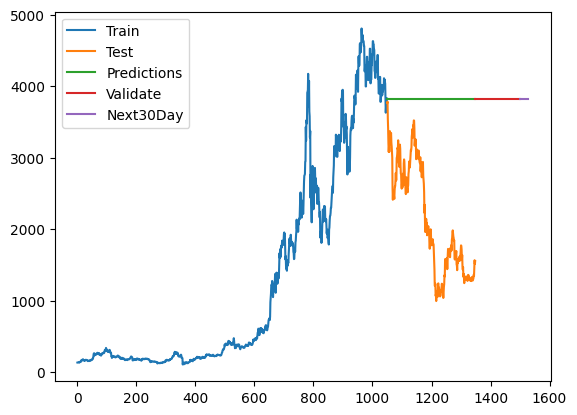

In [31]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred_test)
plt.plot(validation_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()